In [1]:
import numpy as np
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style = 'darkgrid')

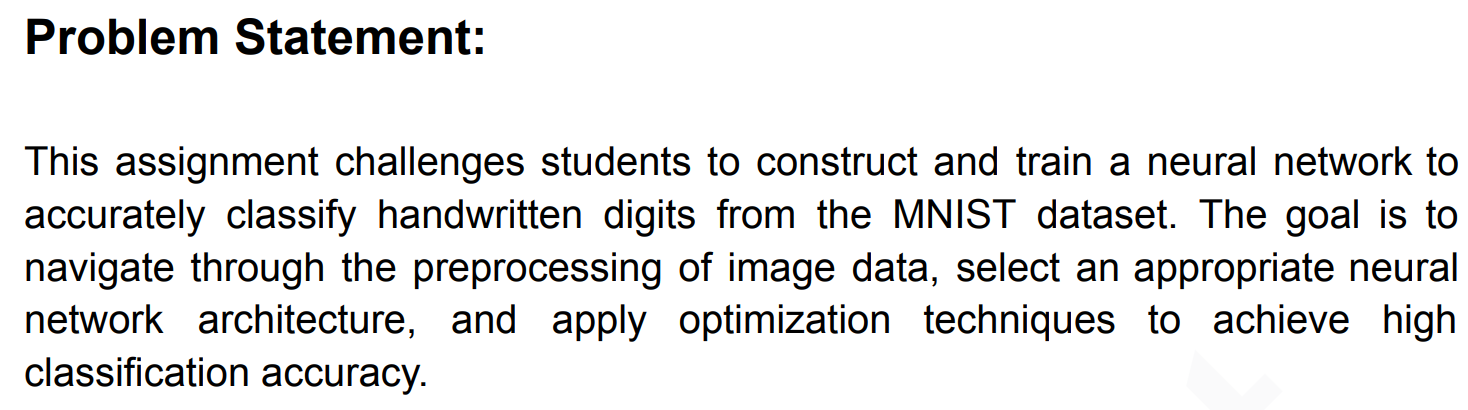

In [2]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

11490434/11490434 [==============================] - 1s 0us/step


## Data Exploration

The shape of the Training data :  (60000, 28, 28)
The shape of the Testing data  :  (10000, 28, 28) 



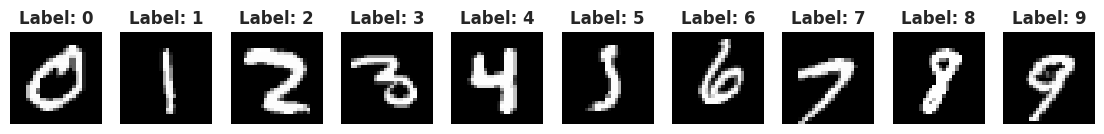

In [3]:
plt.subplots(1,10, figsize = (14,12))

for i in range(1,11):
  plt.subplot(1,10,i)
  plt.imshow(x_train[y_train == i-1][i], cmap = 'gray')
  plt.axis('off')
  plt.title(f"Label: {i-1}", weight = 'black')

print('The shape of the Training data : ', x_train.shape) # print the dimentions of the train data
print('The shape of the Testing data  : ', x_test.shape, '\n') # print the size of the training set

In [4]:
x_train_flat = x_train.reshape(x_train.shape[0], 784)
x_test_flat = x_test.reshape(x_test.shape[0], 784)

In [5]:
print('The shape of the Training data : ', x_train_flat.shape) # print the dimentions of the train data
print('The shape of the Testing data  : ', x_test_flat.shape) # print the size of the training set

The shape of the Training data :  (60000, 784)
The shape of the Testing data  :  (10000, 784)


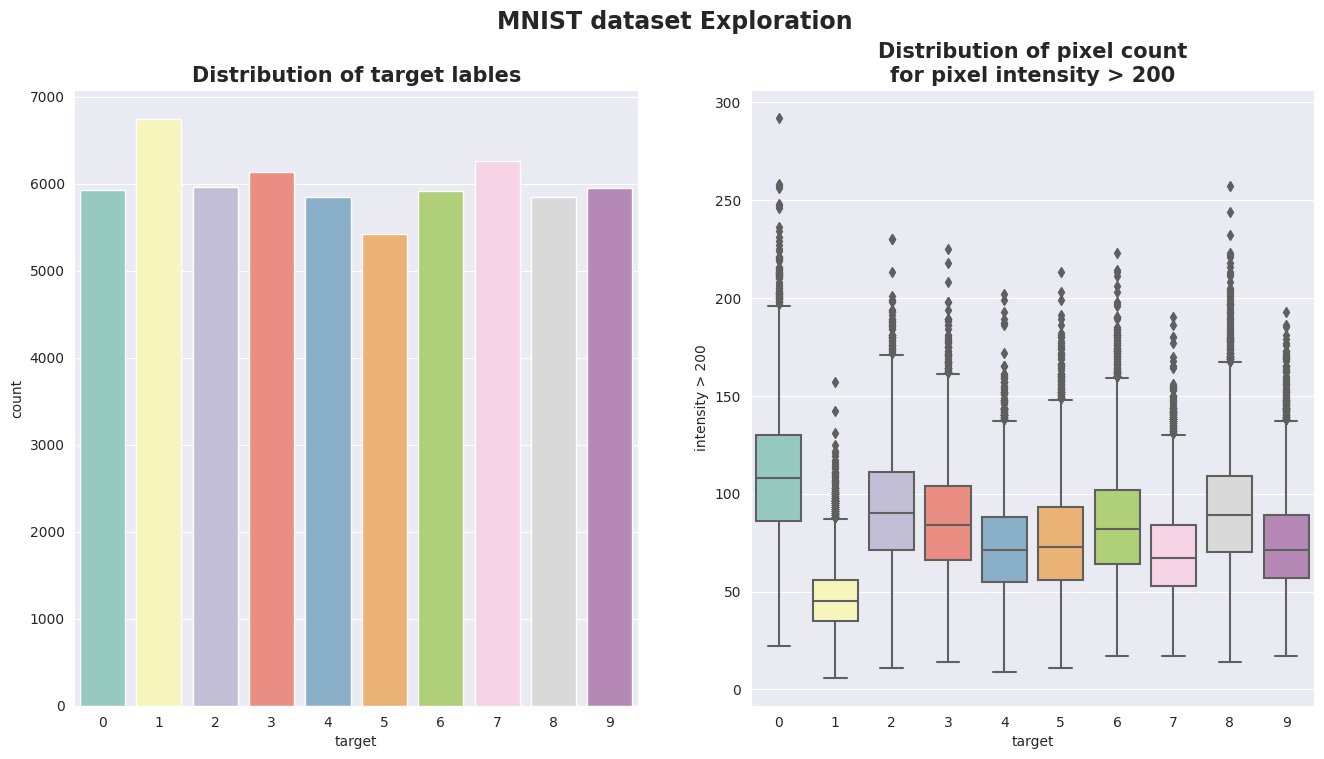

In [6]:
train_df = pd.DataFrame(x_train_flat)
train_df['intensity > 200'] = (x_train_flat>200).astype(int).sum(axis = 1)
train_df['target'] = y_train

plt.subplots(1,2, figsize = (16,8))

plt.subplot(121)
sns.countplot(x = 'target', data = train_df, palette = 'Set3')
plt.title('Distribution of target lables', weight = 'black', fontsize = 15)

plt.subplot(122)
sns.boxplot(x = 'target', y = 'intensity > 200', data = train_df , palette = 'Set3')
plt.title("Distribution of pixel count" + '\n' + 'for pixel intensity > 200', weight = 'black', fontsize = 15)

plt.suptitle("MNIST dataset Exploration",  weight = 'black', fontsize = 17)
plt.show()

- The distribution of the target labels implies that the dataset is approximately balanced.
- Second plot shows the distribution of the pixels having intensity greater than 200 for each class.
- The distribution for each class overlaps to each other therefore classification of the classes based on statistical properties or any hueristic rule will be difficult and time consuming task.
- Overlapping distribution is similar for all the thresholds of pixel intensities (not shown here).

In [7]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

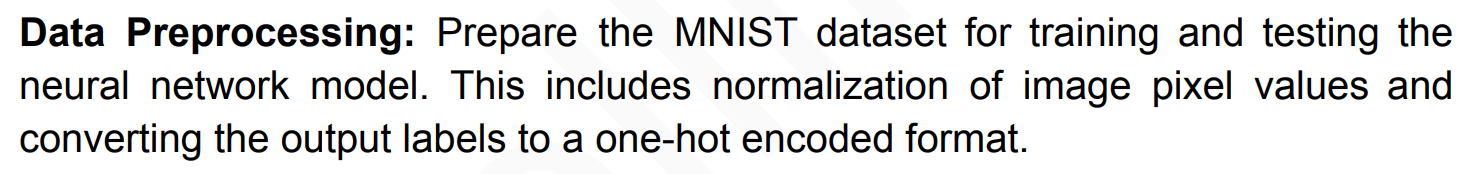

In [8]:
import tensorflow as tf

nn_train = x_train / 255.0
nn_test = x_test / 255.0

y_train_v2 = tf.keras.utils.to_categorical(y_train)


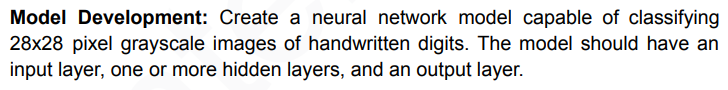

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((28, 28), name="InputLayer"))
model.add(tf.keras.layers.Flatten(name="Flat"))
model.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu, name="HiddenLayer1"))
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax, name="Output"))


model.compile(optimizer=tf.keras.optimizers.SGD(), # Back prop
              loss=tf.keras.losses.categorical_crossentropy,  # Error Calculation
              metrics = ["acc"]) # Accuracy

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flat (Flatten)              (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               78500     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


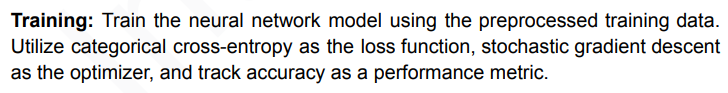

In [11]:
model.compile(optimizer=tf.keras.optimizers.SGD(), # Back prop
              loss=tf.keras.losses.categorical_crossentropy,  # Error Calculation
              metrics = ["acc"]) # Accuracy

history = model.fit(nn_train, y_train_v2, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6861 - acc: 0.8275
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3377 - acc: 0.9054
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2876 - acc: 0.9190
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2579 - acc: 0.9268
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2361 - acc: 0.9330
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2185 - acc: 0.9382
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2038 - acc: 0.9429
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1913 - acc: 0.9462
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1805 - acc: 0.9490
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1707 - acc: 0.9516
Epoch 11/30
1875/1875 [======

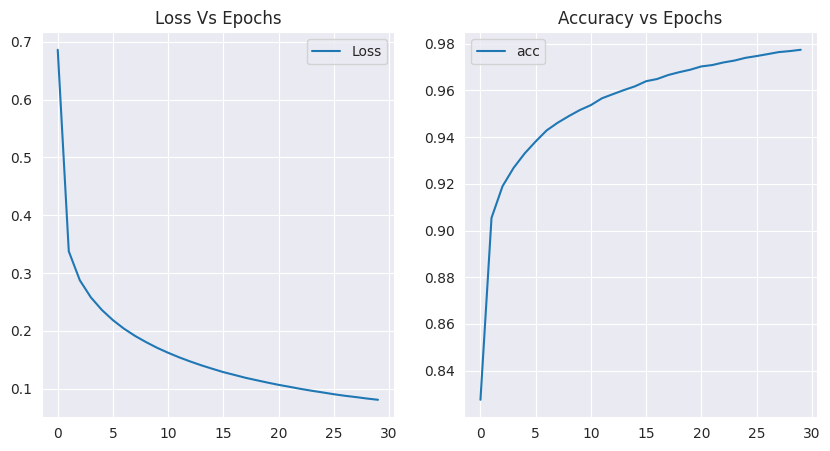

In [13]:
plt.subplots(1,2, figsize=(10,5))

plt.subplot(121)
plt.plot(history.history["loss"], label="Loss")
plt.title('Loss Vs Epochs')
plt.legend()

plt.subplot(122)
plt.plot(history.history["acc"], label="acc")
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

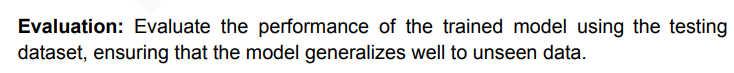

In [16]:
performance = model.evaluate(x_test, tf.keras.utils.to_categorical(y_test))
print('Loss of model on test set:', np.round(performance[0], 2))
print('Accuracy of the model on test Set:', np.round(performance[1],2))

313/313 [==============================] - 2s 5ms/step - loss: 14.8737 - acc: 0.9683
Loss of model on test set: 14.87
Accuracy of the model on test Set: 0.97


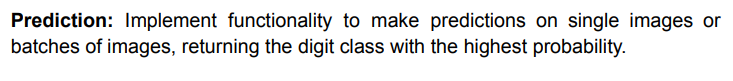

In [17]:
def predict_func(image):

  image = image / 255.0
  image = np.expand_dims(image, axis=0)
  results = model.predict(image)

  return np.argmax(results)

1/1 [==============================] - 0s 36ms/step


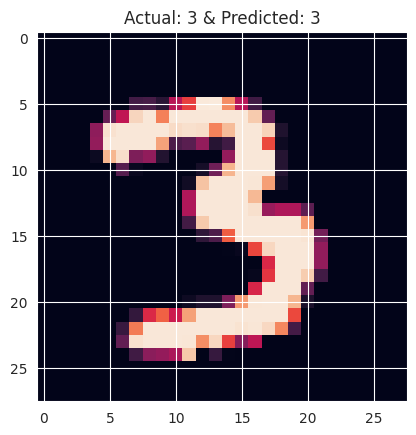

In [20]:
plt.imshow(x_test[500])
result = predict_func(x_test[500])
plt.title(f"Actual: {y_test[500]} & Predicted: {result}")
plt.show()

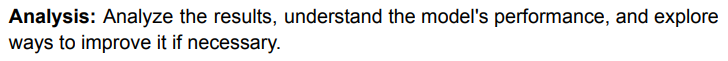

In [21]:
nn_pred = np.argmax(model.predict(nn_test), axis = 1)

313/313 [==============================] - 1s 3ms/step


In [22]:
scores = pd.DataFrame()
scores["y_pred"] = nn_pred
scores["y_test"] = y_test
scores.head()

y_pred  y_test
0       7       7
1       2       2
2       1       1
3       0       0
4       4       4

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(scores['y_test'], scores['y_pred'])
print('Accuracy of ANN on MNIST dataset is', accuracy)


Accuracy of ANN on MNIST dataset is 0.9703


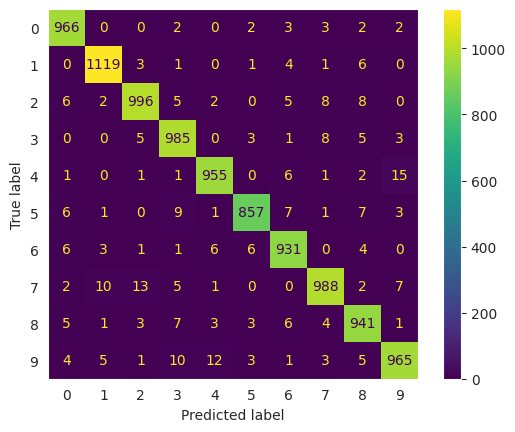

In [28]:
cm = confusion_matrix(scores['y_test'], scores['y_pred'])
ConfusionMatrixDisplay(cm, display_labels=range(0,10)).plot()
plt.grid(False)
plt.show()

## Observations

- Labels `3 and 4` are getting confused with label `9`
- Labels `1 and 2` are getting confused with label `7`